<a href="https://colab.research.google.com/github/valeriallactayo/sar-download/blob/main/dynamicworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install GDAL
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.4 MB/s eta 0:00:00


In [9]:
import os
import tifffile
import matplotlib.pyplot as plt
import rasterio
import numpy as np


In [10]:
path = '/content/drive/MyDrive/INAIGEM/PAPER_SAR/scripts/data/dynamicworld/dynamicworld'

In [11]:
listfiles = os.listdir(path)


In [13]:
files = [os.path.join(path, f) for f in listfiles if f.endswith('.tif')]

In [14]:
imgb9 = []
for ruta in files:
    with rasterio.open(ruta) as src:
        imgb9.append(src.read(9))

In [15]:
# Apila las bandas verticalmente
stack = np.stack(imgb9, axis=0)

In [53]:
np.save("/content/drive/MyDrive/INAIGEM/PAPER_SAR/scripts/data/stack.npy", stack)

In [16]:
print("Dimensiones del stack:", stack.shape)

Dimensiones del stack: (106, 1543, 1063)


In [17]:
import matplotlib.pyplot as plt

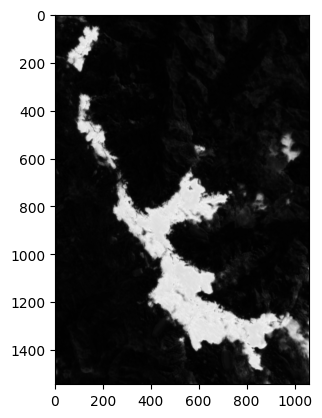

In [21]:
# Visualiza la primera imagen del stack
plt.imshow(stack[105,:,:], cmap='gray')
plt.show()

In [24]:
import geopandas as gpd

In [56]:
# Ruta del archivo gpkg - OESTE
linepathwest = '/content/drive/MyDrive/INAIGEM/PAPER_SAR/scripts/line_points/west/line1.gpkg'

# Lee el archivo gpkg - ESTE
gdf_west = gpd.read_file(linepathwest)


In [44]:
# Ruta del archivo gpkg
linepatheast = '/content/drive/MyDrive/INAIGEM/PAPER_SAR/scripts/line_points/east/line.gpkg'

# Lee el archivo gpkg
gdf_east = gpd.read_file(linepatheast)

In [45]:
# Lee los metadatos del GeoTIFF
with rasterio.open(files[1]) as src:
    bounds = src.bounds

# Imprime los límites de la imagen
print(bounds)

BoundingBox(left=489070.0, bottom=8679600.0, right=499700.0, top=8695030.0)


In [ ]:
# Visualiza la primera imagen del stack
plt.imshow(stack[25,:,:], cmap='gray', extent=[489070.0, 499700.0, 8679600.0, 8695030.0])

# Superpone los puntos oeste del shapefile en la imagen
gdf_west.plot(ax=plt.gca(), markersize=2, color='red')

# Superpone los puntos este del shapefile en la imagen
gdf_east.plot(ax=plt.gca(), markersize=2, color='blue')

# Muestra la imagen y los puntos
plt.show()

In [51]:
# Ruta del archivo gpkg
ruta_gpkg = '/content/drive/MyDrive/INAIGEM/PAPER_SAR/scripts/line_points/west/line1.gpkg'

# Carga los datos del archivo gpkg en un objeto GeoDataFrame
gdf = gpd.read_file(ruta_gpkg)

# Imprime la tabla de atributos del GeoDataFrame
print(gdf)

    Contour                        geometry
0    4600.0  POINT (496017.426 8680383.786)
1    4610.0  POINT (495992.409 8680384.124)
2    4620.0  POINT (495970.901 8680386.795)
3    4630.0  POINT (495941.538 8680393.864)
4    4640.0  POINT (495840.737 8680442.152)
..      ...                             ...
86   5460.0  POINT (494933.616 8682413.197)
87   5470.0  POINT (494942.601 8682432.403)
88   5480.0  POINT (494949.243 8682449.280)
89   5490.0  POINT (494958.188 8682465.557)
90   5500.0  POINT (494978.117 8682485.636)

[91 rows x 2 columns]


In [ ]:
# Ruta del archivo gpkg
ruta_gpkg = 'ruta/al/archivo.gpkg'

# Carga los datos del archivo gpkg en un objeto GeoDataFrame
gdf = gpd.read_file(ruta_gpkg)

# Ruta del archivo TIFF
ruta_tiff = 'ruta/al/stack.tif'